In [261]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure
plt.rcParams["figure.figsize"] = (10,10)

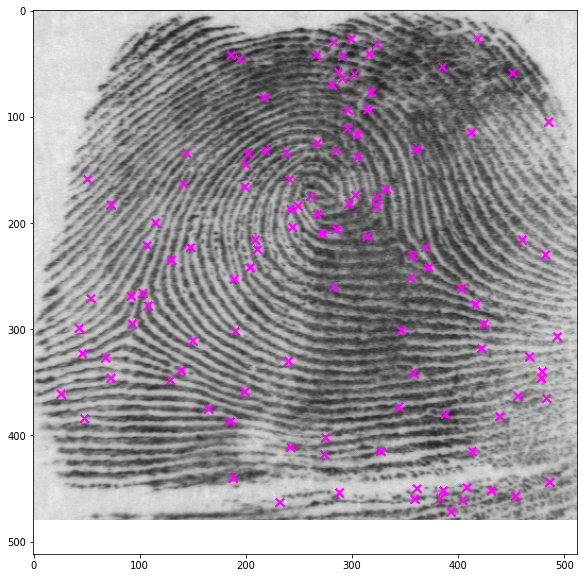

uint8 (512, 512, 3)


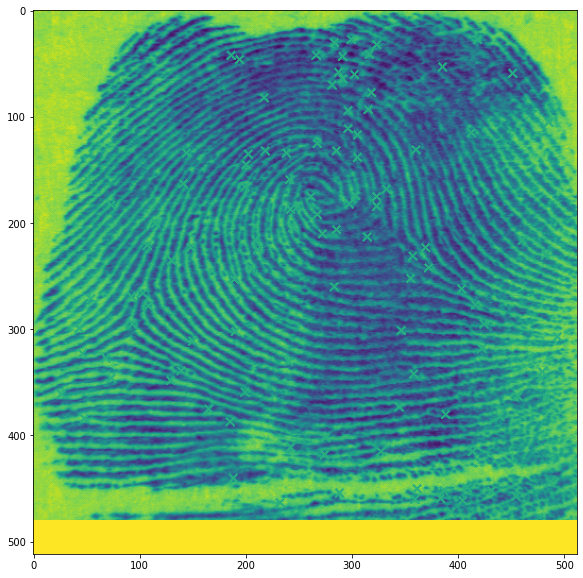

uint8 (512, 512)


In [263]:
src = cv.imread("/mnt/d/Biometrics Project/python/open_fields_examples/f0011_02_min.bmp")
plt.imshow(src)
plt.show()
print(src.dtype, src.shape)
gray_src = cv.imread("/mnt/d/Biometrics Project/python/open_fields_examples/f0011_02_min.bmp", cv.IMREAD_GRAYSCALE)
plt.imshow(gray_src)
plt.show()
print(gray_src.dtype, gray_src.shape)

uint8 (512, 512)


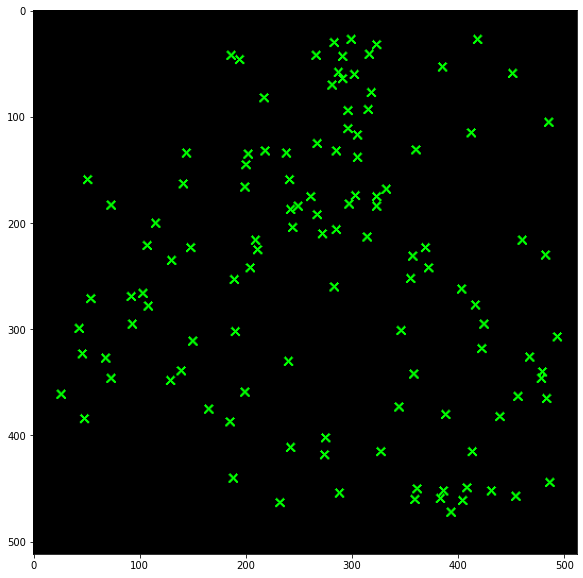

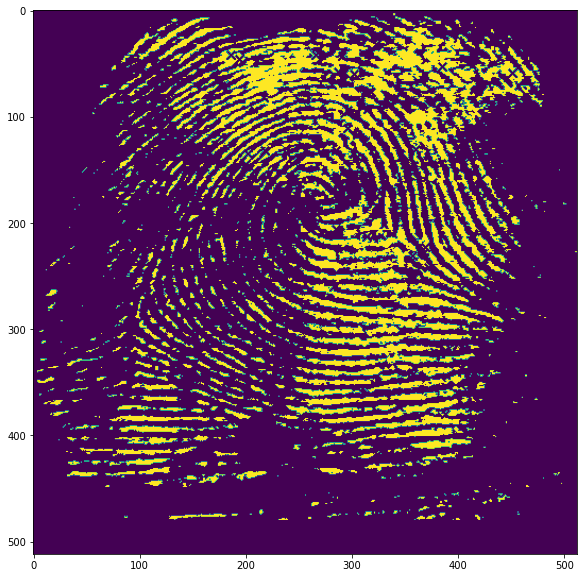

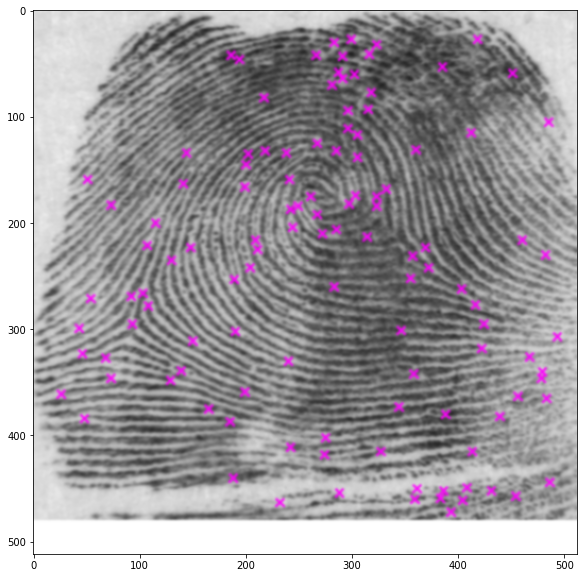

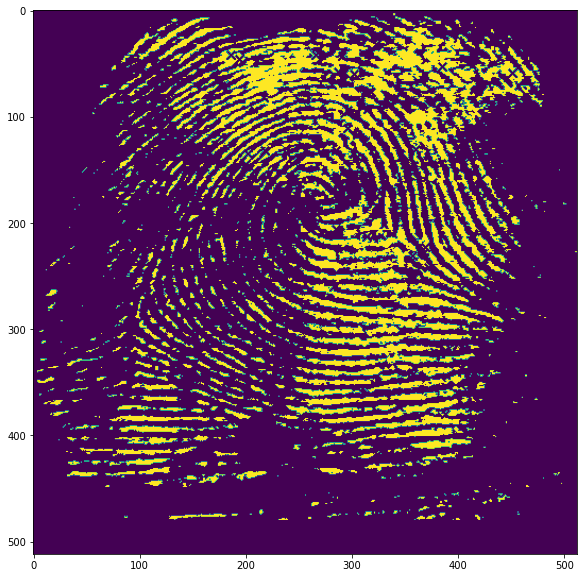

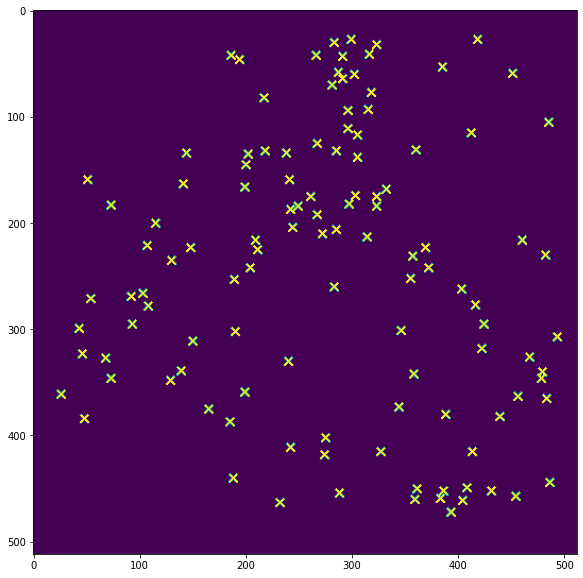

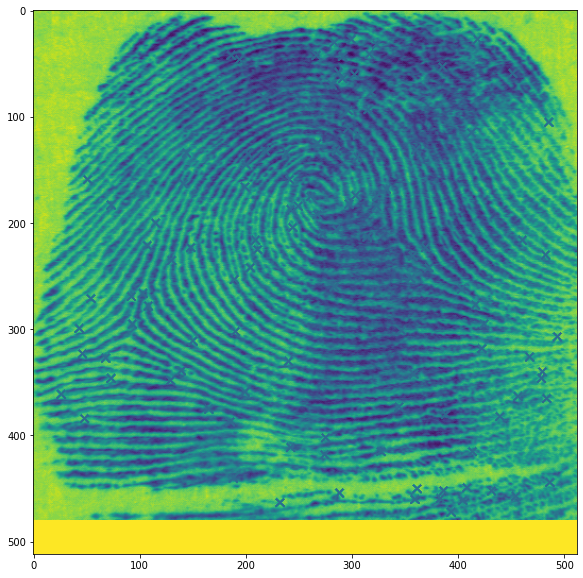

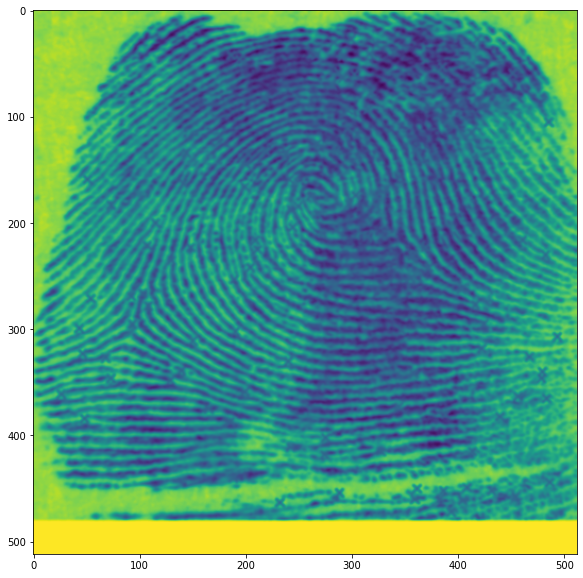

In [264]:
ROI = np.zeros(src.shape, np.uint8)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY) 
#gray_img = plt.imshow(gray)
print(gray.dtype, gray.shape)

im_gray = cv.GaussianBlur(src, (5, 5), 0)

#ret, im_th = cv.threshold(im_gray, 90, 255, cv.THRESH_BINARY_INV)
ret, im_th_1 = cv.threshold(src, 0, 255, cv.THRESH_BINARY_INV)
ret, im_th_2 = cv.threshold(gray_src, 90, 255, cv.THRESH_BINARY_INV)
ret, im_th = cv.threshold(gray, 90, 255, cv.THRESH_BINARY_INV)
plt.imshow(im_th_1)
plt.show()
plt.imshow(im_th_2)
plt.show()
plt.imshow(im_gray)
plt.show()
plt.imshow(im_th)
plt.show()
#gray = cv.cvtColor(im_th, cv.COLOR_BGR2GRAY) 
#plt.imshow(gray)
#plt.show()
gray = cv.cvtColor(im_th_1, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()
gray = cv.cvtColor(im_gray, cv.COLOR_BGR2GRAY) 
plt.imshow(gray)
plt.show()

(512, 512, 3) uint8


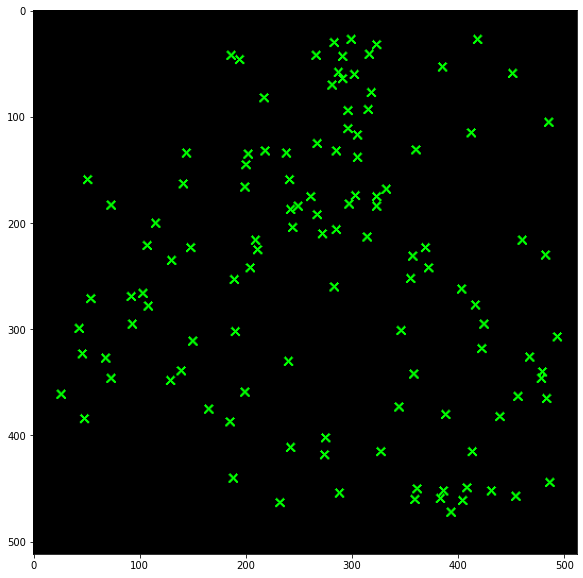

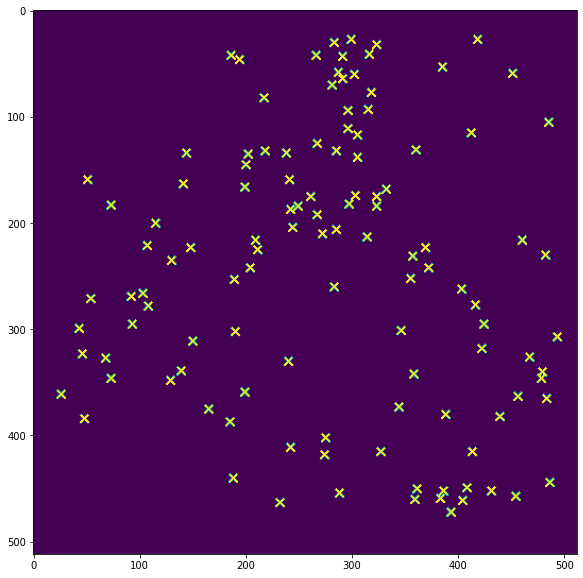

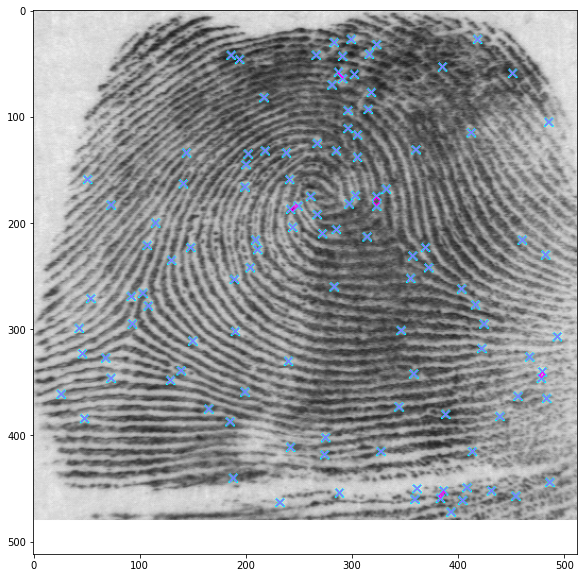

In [266]:
print(im_th_1.shape, im_th_1.dtype)
#im_th_1 = cv.cvtColor(im_th_1, cv.COLOR_RGB2GRAY) 
im_th_1_gray = cv.cvtColor(im_th_1, cv.COLOR_RGB2GRAY) 
ctrs, hier = cv.findContours(im_th_1_gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#print(ctrs)

plt.imshow(im_th_1)
plt.show()

plt.imshow(im_th_1_gray)
plt.show()

img = cv.drawContours(src.copy(), ctrs, -1, (0,255,255), 1)
plt.imshow(img)
plt.show()

# ctrs, hier = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# #print(ctrs)
# img = cv.drawContours(src.copy(), ctrs, -1, (0,255,255), 1)
# plt.imshow(img)
# plt.show()




#image, ctrs, hier = cv.findContours(gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_th_1.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_gray.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(src.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#image, ctrs, hier = cv.findContours(im_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

/mnt/d/Biometrics Project/python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


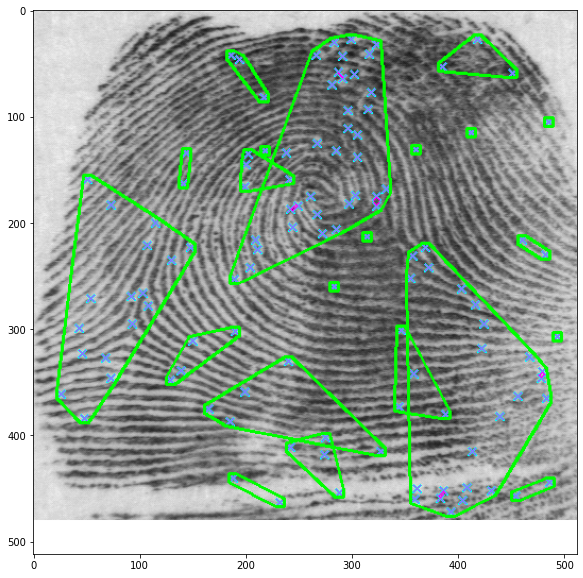

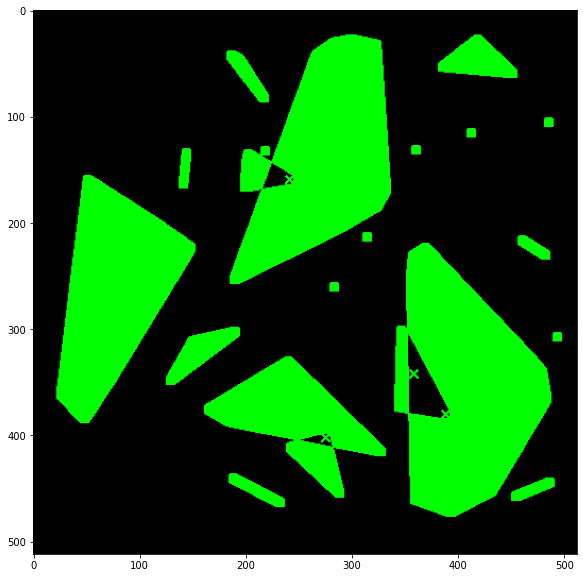

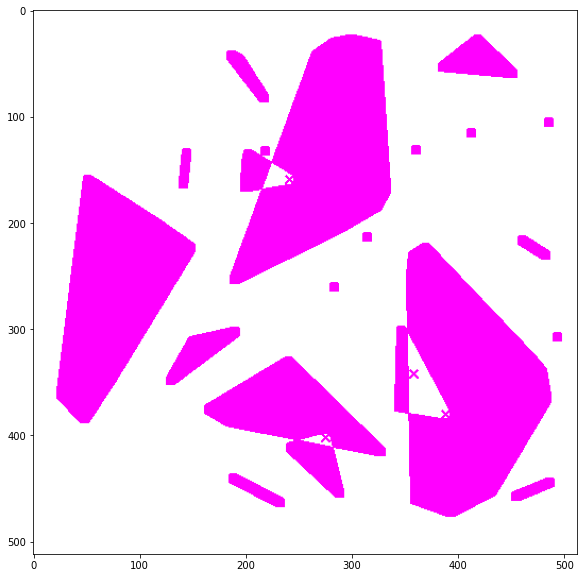

In [272]:
contours = ctrs
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 40 :
                return True
            elif i==row1-1 and j==row2-1:
                return False
            
            
LENGTH = len(ctrs)
status = np.zeros((LENGTH,1))

for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv.convexHull(cont)
        unified.append(hull)

img_1 = cv.drawContours(img.copy(),unified,-1,(0,255,0),2)
#img_3 = cv.drawContours(thresh,unified,-1,255,-1)


img_2 = cv.drawContours(im_th_1.copy(), unified, -1, (0,255,0), -1)
plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()

ret, im_g = cv.threshold(img_2, 0, 255, cv.THRESH_BINARY_INV)
plt.imshow(im_g)
plt.show()


In [299]:
import cv2
from scipy.spatial import distance as dist
import fet

211
204
244
283
272
209
189
285
267
242
249
261
314
190
297
240
241
199
303
148
323
323
200
238
355
357
130
150
218
346
332
202
285
267
199
305
369
372
141
115
107
108
139
305
103
296
144
358
165
185
92
129
93
296
403
275
344
360
217
242
315
416
274
281
73
318
424
291
327
54
287
422
302
68
388
73
188
266
194
291
43
186
51
412
46
288
316
460
232
283
299
323
361
467
385
439
482
413
48
456
359
26
386
479
478
383
493
408
483
404
393
451
485
418
431
454
486
263
92


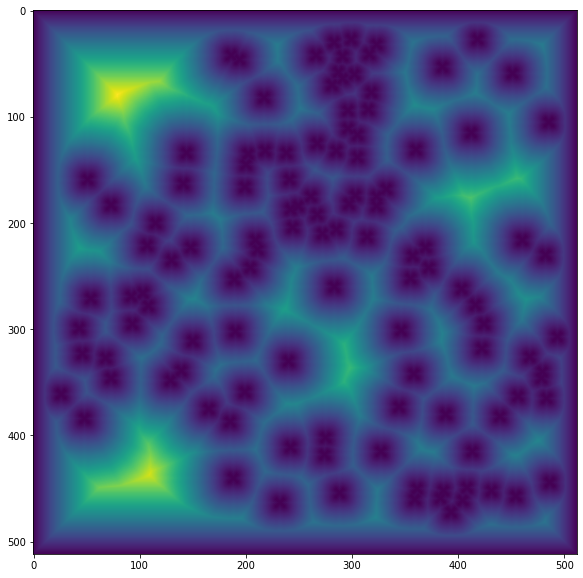

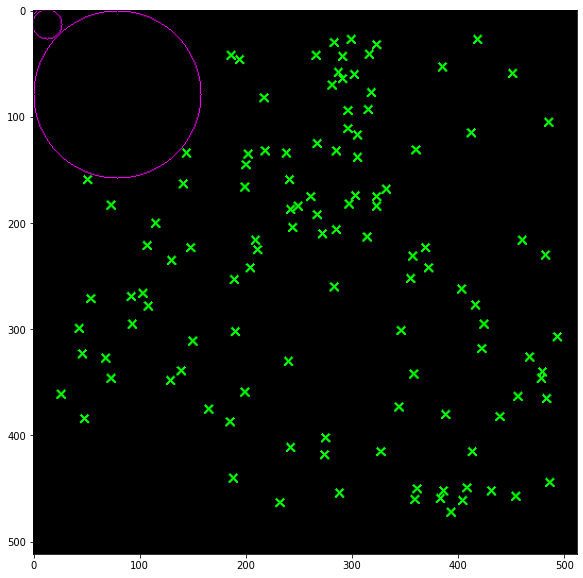

In [313]:
file = open('/mnt/d/Biometrics Project/python/open_fields_examples/f0011_02.fet')
features = fet.parse(file.read())

#img = cv.imread("/mnt/d/Biometrics Project/python/open_fields_examples/f0010_01_min.bmp")
img = im_th_1.copy()
#img = img_2.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold to binary and invert so background is white and xxx are black
thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]
thresh = 255 - thresh

# add black border around threshold image to avoid corner being largest distance
thresh2 = cv2.copyMakeBorder(thresh, 1,1,1,1, cv2.BORDER_CONSTANT, (0))
h, w = thresh2.shape

# create zeros mask 2 pixels larger in each dimension
mask = np.zeros([h + 2, w + 2], np.uint8)

# apply distance transform
distimg = thresh2.copy()
distimg = cv2.distanceTransform(distimg, cv2.DIST_L2, 5)

# remove excess border
distimg = distimg[1:h-1, 1:w-1]

distimg_1 = distimg.copy()

# get max value and location in distance image
#min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(distimg_1)


# scale distance image for viewing
distimg = skimage.exposure.rescale_intensity(distimg, in_range='image', out_range=(0,255))
distimg = distimg.astype(np.uint8)

plt.imshow(distimg)
plt.show()

# draw circle on input
result = img.copy()

# centx = max_loc[0]
# centy = max_loc[1]
# radius = int(max_val)
# cv2.circle(result, (centx, centy), radius, (255,0,255), 1)
# print('center x,y:', max_loc,'center radius:', max_val)

list_of_circles = []
max_loc = [1,1]
count = 0
while(count <35 and max_loc[1]!=-1):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(distimg_1)  
    adder = True
    if list_of_circles and max_loc[1]!=-1:
        for val in list_of_circles: # modifying list when using?
            # check if new point is far away from all older 
            # circles centres and distances)
            # check if circle is far away from other circles - current
            # check if circle doesn't include any minutae 
            if dist.euclidean((max_loc[0],max_loc[1]), 
                              # circle isn't near other circle
                              (val[0], val[1])) < (val[2]+int(max_val)): 
                    adder = False
                    break
        for minutia in features.minutiae:
            # circle doesn't contain any features
            if dist.euclidean((minutia.x, minutia.y),           
                         (max_loc[0],max_loc[1])) < int(max_val):
                    adder = False
                    break
    if(adder):
        count+=1
        centx = max_loc[0]
        centy = max_loc[1]
        radius = int(max_val)
        list_of_circles.append((max_loc[0], max_loc[1], radius))
        cv2.circle(result, (centx, centy), radius, (255,0,255), 1)
    if max_loc[1]!=-1:
        distimg_1 = np.delete(distimg_1, max_loc[1], 0) 
        
        
plt.imshow(result)
plt.show()


# distimg_1 = np.delete(distimg_1, 322, 0)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(distimg_1)
# centx = max_loc[0]
# centy = max_loc[1]
# radius = int(max_val)
# cv2.circle(result, (centx, centy), radius, (0,0,255), 1)
# print('center x,y:', max_loc,'center radius:', max_val)
# for i, v in enumerate(distimg_1):
#     print(i, v)

# save image
#cv2.imwrite('xxx_distance.png',distimg)
#cv2.imwrite('xxx_radius.png',result)

# show the images
# cv2.imshow("thresh", thresh)
# cv2.imshow("thresh2", thresh2)
# cv2.imshow("distance", distimg)
# cv2.imshow("result", result)

# plt.imshow(thresh)
# plt.show()
# plt.imshow(thresh2)
# plt.show()


In [20]:
ret, binary = cv.threshold(gray, 0, 255, 
                cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE)  # Adaptive Binarization
 
out_binary, contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, 
                                    cv.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)